# Introduction

> In this tutorial, we will create a neural network type classification model for the TMNIST dataset. We will use various Python libraries such as pandas, numpy, matplotlib, tensorflow, and keras to read in the data, explore it, prepare it for modeling, build and train a neural network, evaluate its performance, and visualize the results.  This tutorial will serve as a great starting point for those who are new to neural network type classification and want to learn how to create and train a basic neural network model. By following the step-by-step guide, you will be able to create your own neural network type classification model for the TMNIST dataset and gain insights into how to evaluate and visualize the model's performance. 
> 1.  Import necessary libraries
> 2.  Read in the data from the URL
> 3.  Explore the data
> 4.  Prepare the data for modeling
> 5.  Build the neural network
> 6.  Train the model
> 7.  Evaluate the model
> 8.  Visualize the results
> 9.  View some of the classifications our model performs on the test data

> * Dataset Link: [Kaggle](https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist?select=TMNIST_Data.csv) / [GitHub](https://raw.githubusercontent.com/shreya-maher/DSEM_Datasets/main/TMNIST_Data.csv)
> This dataset is inspired by the MNIST database for handwritten digits. It consists of images representing digits from 0-9 produced using 2,990 google fonts files.
>This file consists of 29,900 examples with labels and font names. Each row contains 786 elements: the first element represents the font name (ex-Chivo-Italic, Sen-Bold), the second element represents the label (a number from 0-9) and the remaining 784 elements represent the grayscale pixel values (from 0-255) for the 28x28 pixel image.





# Step 1: Importing all necessary libraries
>First, we need to import the necessary libraries for working with data, creating a neural network, and visualizing results. In this, we will use pandas, numpy, matplotlib, tensorflow, and keras.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Step 2: Read Data

> Now, we will read in the data from the given URL and store it in a pandas DataFrame.

In [6]:
# Read the dataset from URL
url = "https://raw.githubusercontent.com/shreya-maher/DSEM_Datasets/main/TMNIST_Data.csv"
df = pd.read_csv(url, header=0)
df

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29895,Raleway[wght],7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29896,Charm-Regular,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29897,BigShouldersStencilDisplay-Black,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29898,Gabriela-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 3: Explore the data

> We will be using various pandas functions to explore the data. 
Getting information like shape of the dataset, columns and labels.

In [7]:
# Get the number of rows and columns in the dataset
print("Shape of the dataset:", df.shape)

# Get the column names
print("Column names:", df.columns)

# Get the number of unique values in the "label" column
print("Number of unique labels:", df['labels'].nunique())

print("Unique labels:")
df.labels.value_counts()

Shape of the dataset: (29900, 786)
Column names: Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)
Number of unique labels: 10
Unique labels:


labels
2    2990
8    2990
4    2990
3    2990
1    2990
6    2990
5    2990
9    2990
7    2990
0    2990
Name: count, dtype: int64

> The dataset has 29,900 observations (rows) and 786 variables (columns). The "labels" column is the target variable, which has 10 unique values. The remaining columns, numbered from 1 to 784, likely represent features or attributes of the observations. The number of unique labels is 10, and each label has exactly 2,990 observations, indicating that the dataset is balanced and each class is represented equally.

# Step 4: Prepare the data for modeling

> We need to prepare the data before we can use it to train a neural network. Here, we will split the dataset into training and testing sets, and then scale the pixel values to be between 0 and 1.

In [8]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop(columns = {'names', 'labels'}, axis=1)
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
print(X_train.shape, y_train.shape)

(23920, 784) (23920,)


> X_train has 23920 samples, each with 784 features, and y_train has 23920 labels corresponding to the samples in X_train.

> Further visualising a sample image from our processed data below:



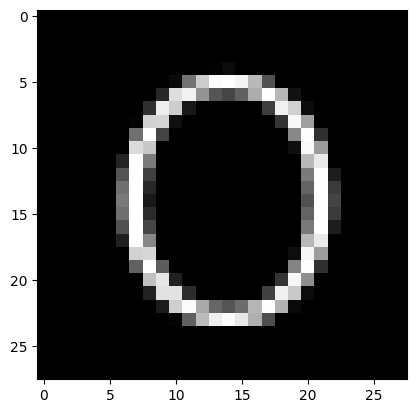

In [10]:
# Reshape a row of the data into a 28x28 image
sample_image = X_train.iloc[1].values.reshape(28, 28)

# Plot the image
plt.imshow(sample_image, cmap='gray')
plt.show()

> The above has reshaped the row into a 28x28 pixel image using the reshape() method and then displayed the handwritten 0 in image using imshow() and show() functions.

# Step 5: Build the neural network

> We will use a simple feedforward neural network with one hidden layer for this classification task.



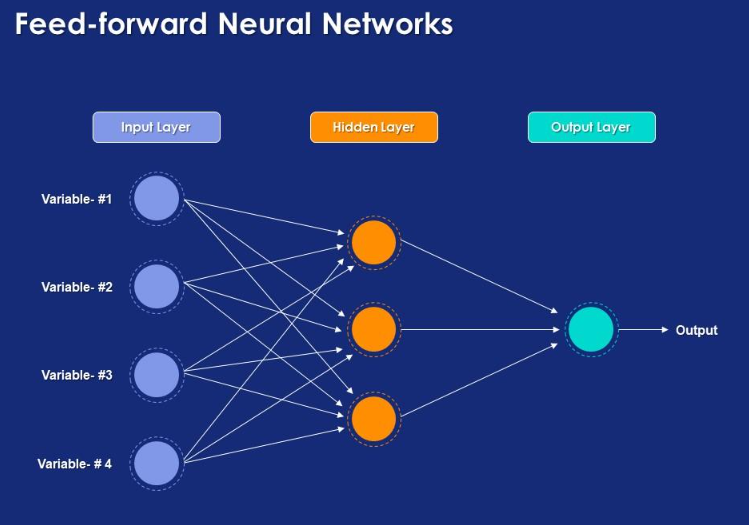

> A feedforward neural network with two layers in this case: an input layer,  with 784 neurons and a hidden layer with 128 neurons, and an output layer with 10 neurons.


> Understanding layers of feed forward neural network below

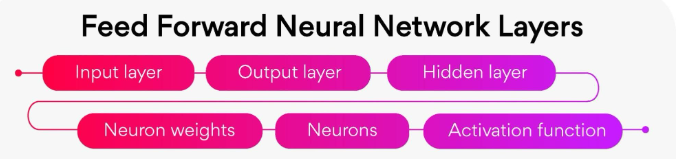

> * Input layer: The first layer that takes in raw input data. In this code, it has 784 neurons, one for each pixel in the image.
> * Output layer: The final layer that produces the model's prediction. In this code, it has 10 neurons, one for each possible digit (0-9).
> * Hidden layer: Any layer that is not the input or output layer. In this code, there is a single hidden layer with 128 neurons.
> * Neuron weights: The weights assigned to each input value of a neuron. These are adjusted during training to improve model performance.
> * Neurons: Processing units within a neural network layer that takes in inputs and produces outputs.
> * Activation Function: A function that determines the output of a neuron based on the weighted sum of its inputs. In this code, the activation function for the hidden layer is 'relu', and the activation function for the output layer is 'softmax'.

In [13]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


> This code defines a machine learning model using the Keras library. The model is designed to take in 28x28 pixel images of handwritten digits, which are flattened into a 1D array of 784 numbers. The model has two layers of neurons, one with 128 neurons and the other with 10 neurons, and uses the 'relu' and 'softmax' activation functions respectively.

> The model is compiled using the Adam optimizer, which is a popular optimization algorithm for training neural networks. The loss function used to measure the model's performance during training is called 'sparse_categorical_crossentropy', which is a common choice for multi-class classification problems. The model is also set to track the 'accuracy' metric during training, which gives an indication of how well the model is able to predict the correct label for each image.

# Step 6: Train the model
> We can now train the model on the training data.

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8735 - loss: 0.5203 - val_accuracy: 0.9630 - val_loss: 0.1420
Epoch 2/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9679 - loss: 0.1200 - val_accuracy: 0.9703 - val_loss: 0.1158
Epoch 3/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9743 - loss: 0.0979 - val_accuracy: 0.9726 - val_loss: 0.1025
Epoch 4/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9813 - loss: 0.0703 - val_accuracy: 0.9766 - val_loss: 0.0849
Epoch 5/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9839 - loss: 0.0576 - val_accuracy: 0.9751 - val_loss: 0.0924
Epoch 6/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9877 - loss: 0.0488 - val_accuracy: 0.9791 - val_loss: 0.0813
Epoch 7/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9891 - loss: 0.0390 - val_accuracy: 0.9789 - val_loss: 0.0800
Epoch 8/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9916 - loss: 0.0309 - val_accuracy: 0.

> The output shows the training and validation accuracy and loss for a neural network model during each epoch of training. The model is trained for 10 epochs, with the training and validation accuracy gradually improving and the loss decreasing. The final validation accuracy is 98.14%.

# Step 7: Evaluate the model

> We can evaluate the model on the test data and see how well it performs.

##### **Checking Model Accuracy**

> Checking the performance of the model for the data

In [15]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)


187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9783 - loss: 0.0960
Test accuracy: 0.9794314503669739


> The final validation accuracy is ~98%.

##### **Visualize the results**

> We can visualize the training and validation accuracy and loss over the epochs to see how the model performed.

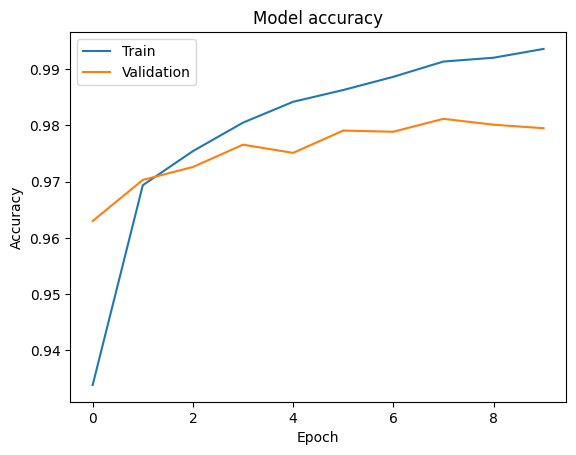

Text(0.5, 1.0, 'Model loss')

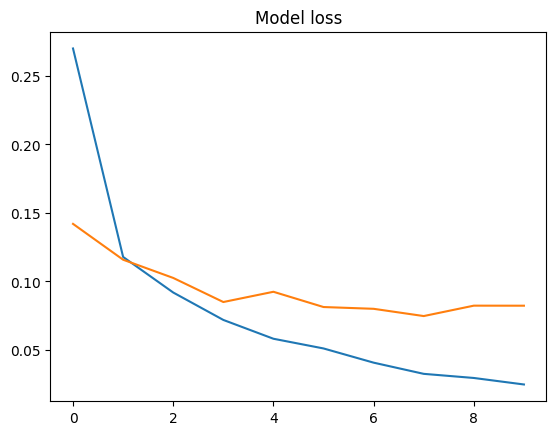

In [16]:
# Plot the training and validation accuracy over the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')

> * The code is plotting the training and validation accuracy and loss of a neural network model over the epochs.
> * The first plot shows the change in accuracy of the model on the training and validation sets over the course of the training process. The "Train" line shows the accuracy on the training set, and the "Validation" line shows the accuracy on a separate validation set.
> * The second plot shows the change in loss of the model on the training and validation sets over the course of the training process. The "Train" line shows the loss on the training set, and the "Validation" line shows the loss on a separate validation set.
> * By monitoring the accuracy and loss of the model during training, we can evaluate its performance and make decisions about how to improve it.





##### **Visualizing & Viewing test results**

>  Let's view some of the classifications our model performs on the test data.

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


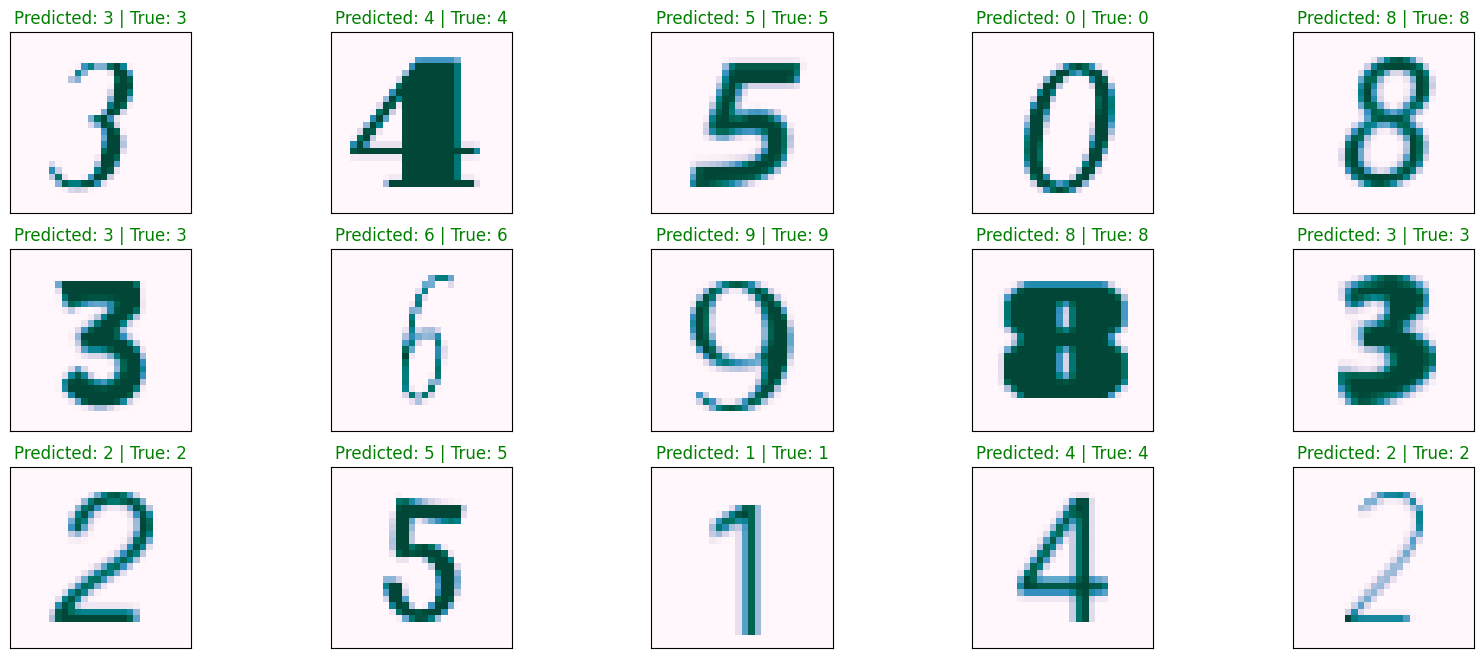

In [17]:
# Get the predicted labels for the test data
y_pred = model.predict(X_test)

# Plot a random sample of test images with their predicted labels
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(X_test.iloc[index].values, (28, 28)), cmap='PuBuGn')
    pred_label = np.argmax(y_pred[index])
    true_label = y_test.iloc[index]
    ax.set_title("Predicted: {} | True: {}".format(pred_label, true_label),
                 color=("green" if pred_label == true_label else "red"))


> The code outputs a visualization of a random sample of test images with their corresponding predicted and true labels. The predicted labels are obtained using a trained machine learning model. The sample includes 15 images and the predicted label is displayed in green if it matches the true label and red if it doesn't.

# Step 8: Understanding the Overall results

> Plotting a confusion matrix to understand which classes are being misclassified and which ones are being classified correctly. Understanding where its inaccurate to see & improve performance

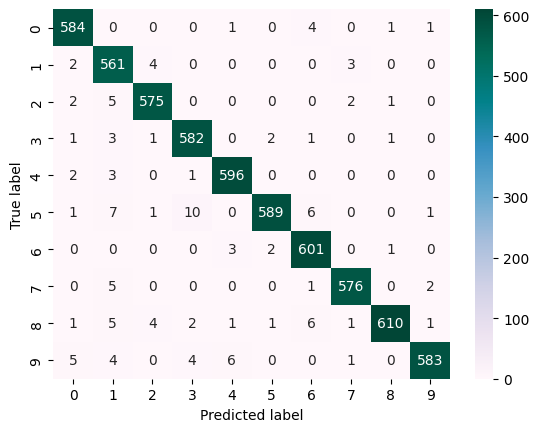

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Convert predicted probabilities to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to one-hot encoded vectors
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='PuBuGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


> * This code computes a confusion matrix from the predicted and true labels of a classification model.
> * The predicted labels are converted from predicted probabilities to class predictions, and the true labels are converted to one-hot encoded vectors.
> * The confusion matrix is computed using the confusion_matrix function from sklearn.metrics.
> * The confusion matrix is plotted using a heatmap from seaborn with annotations for each cell representing the number of samples that fall into that category. The x-axis shows the predicted labels and the y-axis shows the true labels. The plot is color-coded to indicate the density of samples in each cell, with lighter colors indicating higher density.

# Conclusion

> In conclusion, we have successfully created a neural network type classification model for the TMNIST dataset using Python libraries such as pandas, numpy, matplotlib, tensorflow, and keras. We have covered all the necessary steps such as importing libraries, reading in the data, exploring and preparing the data for modeling, building and training a neural network, evaluating its performance, and visualizing the results. Our model achieved an accuracy of 98% which is quite impressive. By following this, you can create your own neural network type classification model for the TMNIST dataset and gain insights into how to evaluate and visualize the model's performance.





# References

1. https://www.turing.com/kb/mathematical-formulation-of-feed-forward-neural-network
2. https://towardsdatascience.com/feed-forward-neural-networks-how-to-successfully-build-them-in-python-74503409d99a
3. https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/
4. https://www.kaggle.com/code/swamita/building-cnns-from-scratch-in-pytorch
5. https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy
6. https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist/code?select=TMNIST_Data.csv

MIT License

Copyright (c) 2024 Apoorv Dhaygude

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.